In [1]:
import pandas as pd
import numpy as np

# Graphical lasso

The graphical lasso is a method proposed by Friedman et al. in 2007 to estimate a sparse graph through a sparse penalty.


This models assumes that the covariates we are analyzing have a multivariate Gaussian distribution with mean $\mu$ and covariance $\Sigma$.

Moreover it is known that if the $ij$-th components of the inverse of the covariance matrix $\Sigma^{-1} = \Theta$ is zero, than the two variables $i$ and $j$ are conditionally independent given the others variable.

Some papers proposed different methods to reach an approximate solution of the problem, typically they are based on the maximization of a likelihood, derived from the distribution, given as 

$$ \text{log det}\Theta - \text{tr}(S\Theta) $$

where $\Theta$ is the inverse of the covariance matrix and its the unknown graph we want to estimate, and $S$ is the empirical covariance of our data. 
If we have a matrix $X \in \mathcal{R}^{n \times d}$ than $S=\frac{1}{n}X^TX \in \mathcal{R}^{d \times d}$

Since the $\Theta$ is supposed to be sparse the final functional imposes also a sparse penalty on it.

$$ \hat{\Theta} = \underset{\Theta}{\text{argmin}}\left(\text{tr}(S\Theta) - \text{log det}(\Theta) + \lambda\sum_{j\neq k}|\Theta_{jk}|\right)$$

## In this lab you are going infer a sparse network in two flavors:
    
    -Supervised
    -Unsupervised
    
**More specifically, you will be given n observations, drawn from a fully specified multivariate Gaussian distribution, whose precisione matrix is known. You will infer a precision matrix by maximizing a score in a cross-validation scheme (supervised) and then you will assume you do not know the underlying distribution (*i.e.* the precision matrix) and will try to infer a precision matrix in an unsupervised manner.**

Define the distribution, the number of samples, variables

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(20)

In [3]:
X = np.load('data.npy')
y = np.load('target.npy')

**The precision matrix is the following `precision`**

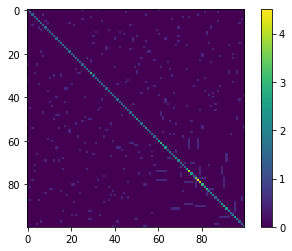

In [4]:
precision = np.load('precision.npy')

plt.imshow(precision, cmap = 'viridis')
plt.colorbar()

**You are going to use the sklearn [GraphLasso](http://scikit-learn.org/stable/modules/generated/sklearn.covariance.GraphLasso.html#sklearn.covariance.GraphLasso)**

Define a plausible list of parameters for the model

In [5]:
alphas = [0.01, 0.05, 0.1, 0.15, 0.5, 0.8, 1, 2, 5, 10, 12, 15, 20, 25, 30, 40, 45, 50, 55, 60, 65, 70, 75, 80, 90, 100]#
import warnings
warnings.filterwarnings("ignore")

For each hyper-parameter in the list `alphas` fit a GraphicaLasso model to your data and choose the best one according to score of your choice (**Hint: remember that inferring the right edges is equivalent to inferring the right class in a binary classificaion problem**).

Estimating network for alpha=0.01 ...
Estimating network for alpha=0.05 ...
Estimating network for alpha=0.1 ...
Estimating network for alpha=0.15 ...
Estimating network for alpha=0.5 ...
Estimating network for alpha=0.8 ...
Estimating network for alpha=1 ...
Estimating network for alpha=2 ...
Estimating network for alpha=5 ...
Estimating network for alpha=10 ...
Estimating network for alpha=12 ...
Estimating network for alpha=15 ...
Estimating network for alpha=20 ...
Estimating network for alpha=25 ...
Estimating network for alpha=30 ...
Estimating network for alpha=40 ...
Estimating network for alpha=45 ...
Estimating network for alpha=50 ...
Estimating network for alpha=55 ...
Estimating network for alpha=60 ...
Estimating network for alpha=65 ...
Estimating network for alpha=70 ...
Estimating network for alpha=75 ...
Estimating network for alpha=80 ...
Estimating network for alpha=90 ...
Estimating network for alpha=100 ...
The best value for the regularization parameter alpha is 

Text(0, 0.5, 'accuracy')

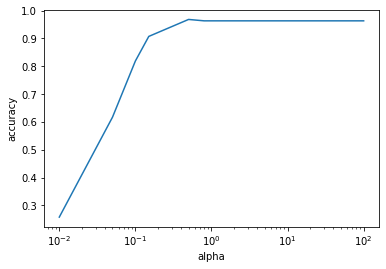

In [6]:
##Your code here
def compute_qtys_needed(y_pred, y, class_labels):
    pos_class = class_labels[class_labels > 0]
    neg_class = class_labels[class_labels <= 0]
    pos_y_idx = y == pos_class
    neg_y_idx = y == neg_class
    pos_y_pred_idx = y_pred == pos_class
    neg_y_pred_idx = y_pred == neg_class
    TP = np.count_nonzero(y_pred[pos_y_idx] == pos_class)
    TN = np.count_nonzero(y_pred[neg_y_idx] == neg_class)
    FP = np.count_nonzero(y[pos_y_pred_idx] == neg_class)
    FN = np.count_nonzero(y[neg_y_pred_idx] == pos_class)
    return TP, TN, FP, FN

def calc_accuracy(y_pred, y, class_labels):
    TP, TN, FP, FN = compute_qtys_needed(y_pred, y, class_labels)
    return (TN + TP)/(float(TN + TP + FP + FN))

    
from sklearn.covariance import GraphicalLasso
from sklearn.covariance import EmpiricalCovariance

adj_ground_truth = np.where(precision != 0, 1, 0)
est_acc = np.zeros(len(alphas))
for idx, alph in enumerate(alphas):
    print ("Estimating network for alpha=%s ..." % alph)
    cov = GraphicalLasso(alpha = alph, max_iter=3000).fit(X)
    precision_matrix = cov.get_precision()
    est_adj = np.where(precision_matrix != 0, 1, 0)
    est_acc[idx] = calc_accuracy(est_adj, adj_ground_truth, np.array([0, 1]))

best_reg_par = np.array(alphas)[np.argmax(est_acc)]
print ("The best value for the regularization parameter alpha is ", best_reg_par)
plt.semilogx(alphas, est_acc)
plt.xlabel("alpha")
plt.ylabel("accuracy")

Define a function able to recover the corresponding adjacency matrix from an arbitrary square matrix

In [7]:
##Your code here

def get_adj_matrix(X, precision_ground_truth, alphas=[0.01, 0.05, 0.1, 0.15, 0.5, 0.8, 1, 2, 5, 10, 12, 15, 20, 25, 30, 40, 45, 50, 55, 60, 65, 70, 75, 80, 90, 100]):
    
    adj_ground_truth = np.where(precision_ground_truth != 0, 1, 0)
    est_acc = np.zeros(len(alphas))
    for idx, alph in enumerate(alphas):
        cov = GraphicalLasso(alpha = alph, max_iter=3000).fit(X)
        precision_matrix = cov.get_precision()
        est_adj = np.where(precision_matrix != 0, 1, 0)
        est_acc[idx] = calc_accuracy(est_adj, adj_ground_truth, np.array([0, 1]))

    best_reg_par = np.array(alphas)[np.argmax(est_acc)]
    best_cov = GraphicalLasso(alpha = best_reg_par, max_iter =1000).fit(X)
    return np.where(best_cov.get_precision() !=0, 1, 0) 


Compare the aground-truth adjacency matrix with the inferred one usign the **Hamming distance**

In [8]:
##Your code here
def hamming_distance(adj_ground_truth, est_adj):
    N = adj_ground_truth.shape[1]
    abs_diff = np.abs(adj_ground_truth-est_adj)
    return np.sum(abs_diff[np.where(np.eye(N) > 0, 0, 1)])/(N*(N-1))

In [9]:
adj_ground_truth = np.where(precision !=0, 1, 0) #with precision, we evaluate in a supervised learning way our estimated network
est_adj = get_adj_matrix(X, precision)

print ("The value of the Hamming distance computed between the ground truth network and the inferred one is ", hamming_distance(adj_ground_truth, est_adj))

The value of the Hamming distance computed between the ground truth network and the inferred one is  3.0303030303030303


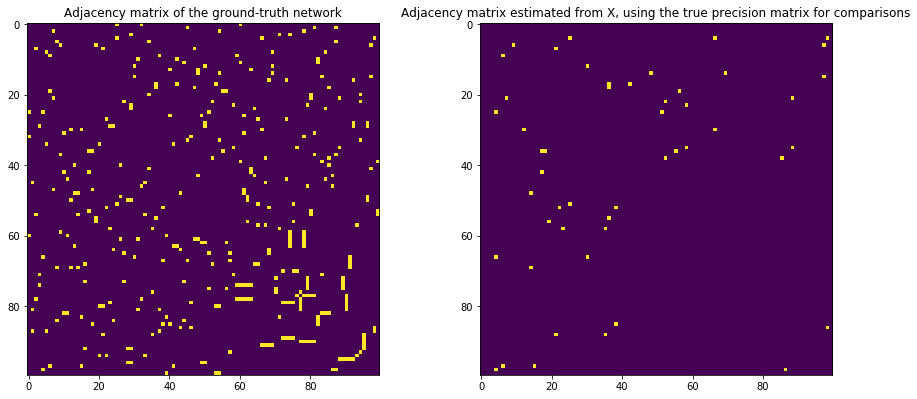

In [10]:
#Plot
plt.figure(figsize=(13, 13))
plt.subplot(121)
plt.imshow(adj_ground_truth * np.where(np.eye(adj_ground_truth.shape[0])==0, 1, 0))
plt.title("Adjacency matrix of the ground-truth network")

plt.subplot(122)
plt.imshow(est_adj * np.where(np.eye(adj_ground_truth.shape[0])==0, 1, 0))
plt.title('Adjacency matrix estimated from X, using the true precision matrix for comparisons');
plt.tight_layout()

### Unsupervised learning of the precision matrix

Assum that you do not know the precision matrix of the underlying data distribution. You need to perform inference of the precision matrix only using your observations. Typically, in this setting, Probabilistic model selection (or “information criteria”) provides an analytical technique for scoring and choosing among candidate models.

You are going to use the **`Bayesian Information Criterion (BIC)`**, ppropriate for models fit under the maximum likelihood estimation framework.

It is defined as:

$$BIC = -2LL + \log(N)k$$

where LL is the log-likelihood of the model, N is the number of examples in the training dataset, and k is the number of parameters in the model.

The score as defined above is minimized, e.g. the model with the lowest BIC is selected.

**Define a function for computing the BIC specific for the Graphical Lasso likelihood:**

$$ \text{log det}\Theta - \text{tr}(S\Theta) $$

In [11]:
def BIC(X, precision_matrix, empirical_covariance, k, N):
    #the number of parameters of a Gaussian model is 2, therefore we set k=2
    eig_vals = np.linalg.eigvals(precision_matrix)
    #the determinant of a square matrix equals the product of all the eigenvalues
    BIC = -2*(np.log(np.prod(eig_vals)) - np.trace(np.dot(empirical_covariance, precision_matrix))) + np.log(N)*k
    return BIC

def BIC_sklearn(X, k, cov, N):
    #the number of parameters of a Gaussian model is 2, therefore we set k=2
    #the determinant of a square matrix equals the product of all the eigenvalues
    BIC = -2*cov.score(X) + np.log(N)*k
    return BIC

**Define a splitting scheme in order to obtain for each split the BIC and for each hyper-parameter a average BIC over the splits. Then plot the average BIC against the parameters.**

In [12]:
from sklearn.covariance import empirical_covariance

def GraphicalLasso_CrossValidation(Xtr, split_strategy, regpar_list):

    regpar_list = np.array(regpar_list)
    num_regpar = regpar_list.size

    n_tot = Xtr.shape[0]

    BIC_m = np.zeros(num_regpar)

    n_splits=split_strategy.get_n_splits(Xtr)
    for kdx, regpar in enumerate(regpar_list):   
        for train_index, val_index in split_strategy.split(Xtr):
            X = Xtr[train_index]
            X_val = Xtr[val_index]
            cov = GraphicalLasso(regpar, max_iter=1000).fit(X)
            emp_cov = empirical_covariance(X_val) #np.dot(np.transpose(X), X) / X.shape[0]#
            est_precision = cov.get_precision()
            N = X.shape[0]
            BIC_m[kdx] = BIC_m[kdx] + BIC(X_val, est_precision, emp_cov, 1, N)
            #Uncomment the following line if you want to apply the metric as computed from sklearn
            #BIC_m[kdx] = BIC_m[kdx] + BIC_sklearn(X, 1,cov, N)
   
    BIC_m = BIC_m / n_splits
    best_regpar_idx = np.argmin(BIC_m)
    best_reg_par = regpar_list[best_regpar_idx]
    cov = GraphicalLasso(best_reg_par, max_iter=1000).fit(Xtr)
    best_est_adj = np.where(cov.get_precision()!=0, 1, 0)
    return best_reg_par, BIC_m, best_est_adj



**After selecting the parameter which minimizes the BIC, compares the inferred network with the ground truth in terms of Hamming distance**

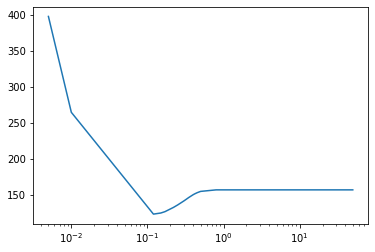

In [13]:
from sklearn.model_selection import ShuffleSplit 
from sklearn.model_selection import KFold

alphas = [0.005, 0.01, 0.12, 0.15, 0.17, 0.22, 0.25, 0.3, 0.32, 0.35, 0.4, 0.42, 0.45, 0.5, 0.8, 1, 2, 5, 10, 15, 17, 20, 22, 25,30, 40, 50]
montecarlo = ShuffleSplit(n_splits=10, test_size=0.1, random_state=1)
best_reg_par, BIC_m, best_est_adj = GraphicalLasso_CrossValidation(X, montecarlo, alphas)
plt.semilogx(alphas, BIC_m)

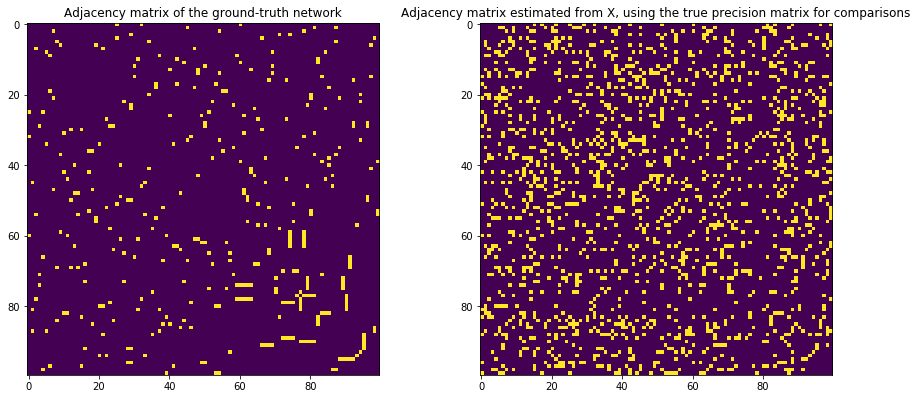

In [14]:
#Plot
plt.figure(figsize=(13, 13))
plt.subplot(121)
plt.imshow(adj_ground_truth * np.where(np.eye(adj_ground_truth.shape[0])==0, 1, 0))
plt.title("Adjacency matrix of the ground-truth network")

plt.subplot(122)
plt.imshow(best_est_adj * np.where(np.eye(adj_ground_truth.shape[0])==0, 1, 0))
plt.title('Adjacency matrix estimated from X, using the true precision matrix for comparisons');
plt.tight_layout()

In [15]:
print ("The value of the Hamming distance computed between the ground truth network and the inferred one is ", hamming_distance(adj_ground_truth, best_est_adj))

The value of the Hamming distance computed between the ground truth network and the inferred one is  15.11111111111111
